In [38]:
import numpy
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
#import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#SHAP
import shap
import xgboost
from mpl_toolkits import mplot3d




import pandas as pd
from sklearn.datasets import make_regression
import random

In [39]:

#Generate data from an additive model

#Step.1 Sinus and Cosinus on [0, 2*pi]
sample = 200
x1 = np.array([np.linspace(0, 2*np.pi, sample)]).T
x1 = np.concatenate(x1)
random.shuffle(x1)


x2 = np.array([np.linspace(0, 2*np.pi, sample)]).T
x2 = np.concatenate(x2)
random.shuffle(x2)

#x_pandas = pd.DataFrame(x)
#Sinus
y_sin = np.sin(x1) # f_1(x_1)


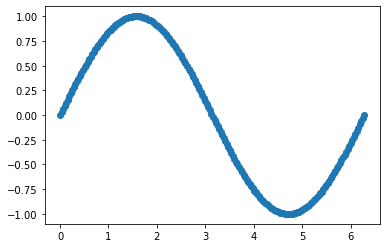

In [40]:
plt.scatter(x1, y_sin, label="Sinus")


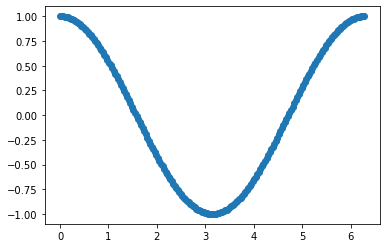

In [41]:
#Cosinus
y_cos = np.cos(x2) # f_2(x_2)
#y_cos_pandas = pd.DataFrame(y_cos) -> for shap
plt.scatter(x2, y_cos, label="Cosinus")

In [42]:
# DGP
dep = y_cos + y_sin + 0.05*np.random.randn(200)  # + constant


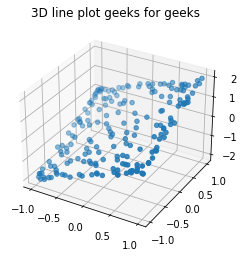

In [43]:
#3d plot
fig = plt.figure()
ax = plt.axes(projection ='3d')
# plotting
ax.scatter3D(y_cos, y_sin, dep, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

In [44]:
x1_pandas = pd.DataFrame(x1)
x2_pandas = pd.DataFrame(x2)
x1_pandas.columns = ['x1']
x2_pandas.columns = ['x2']
design = pd.concat([x1_pandas['x1'], x2_pandas['x2']], axis=1, keys=['x1', 'x2'])


In [45]:
#building the architecture of the NN
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu')) # model expects 2 input variables and 12 layers in first hidden layer
model.add(Dense(64, activation='relu')) # second hidden layer has 8 nodes
model.add(Dense(64, activation='relu')) # second hidden layer has 8 nodes
model.add(Dense(1, activation='linear')) # output layer has 1 node
model.compile(loss='mse', optimizer='rmsprop')
model.fit(design, dep, epochs=800, batch_size=130)
pred = model.predict(design)


Epoch 1/800
2/2 [==============================] - 1s 2ms/step - loss: 0.9547
Epoch 2/800
2/2 [==============================] - 0s 3ms/step - loss: 0.7752
Epoch 3/800
2/2 [==============================] - 0s 3ms/step - loss: 0.6973
Epoch 4/800
2/2 [==============================] - 0s 2ms/step - loss: 0.6772
Epoch 5/800
2/2 [==============================] - 0s 2ms/step - loss: 0.6568
Epoch 6/800
2/2 [==============================] - 0s 2ms/step - loss: 0.6161
Epoch 7/800
2/2 [==============================] - 0s 3ms/step - loss: 0.5861
Epoch 8/800
2/2 [==============================] - 0s 3ms/step - loss: 0.5798
Epoch 9/800
2/2 [==============================] - 0s 3ms/step - loss: 0.5595
Epoch 10/800
2/2 [==============================] - 0s 4ms/step - loss: 0.5531
Epoch 11/800
2/2 [==============================] - 0s 4ms/step - loss: 0.5518
Epoch 12/800
2/2 [==============================] - 0s 3ms/step - loss: 0.5312
Epoch 13/800
2/2 [==============================] - 0s 4ms/st

2/2 [==============================] - 0s 3ms/step - loss: 0.1643
Epoch 207/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1040
Epoch 208/800
2/2 [==============================] - 0s 2ms/step - loss: 0.1066
Epoch 209/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0941
Epoch 210/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 211/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 212/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0760
Epoch 213/800
2/2 [==============================] - 0s 4ms/step - loss: 0.1010
Epoch 214/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0995
Epoch 215/800
2/2 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 216/800
2/2 [==============================] - 0s 4ms/step - loss: 0.1210
Epoch 217/800
2/2 [==============================] - 0s 4ms/step - loss: 0.1027
Epoch 218/800
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 411/800
2/2 [==============================] - 0s 5ms/step - loss: 0.0228
Epoch 412/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 413/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 414/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 415/800
2/2 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 416/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0429
Epoch 417/800
2/2 [==============================] - 0s 3ms/step - loss: 0.1084
Epoch 418/800
2/2 [==============================] - 0s 5ms/step - loss: 0.0916
Epoch 419/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0334
Epoch 420/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 421/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 422/800
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 615/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 616/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 617/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0974
Epoch 618/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 619/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 620/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 621/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 622/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0361
Epoch 623/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 624/800
2/2 [==============================] - 0s 4ms/step - loss: 0.0181
Epoch 625/800
2/2 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 626/800
2/2 [==============================] - 0

Text(0, 0.5, 'dependent variable')

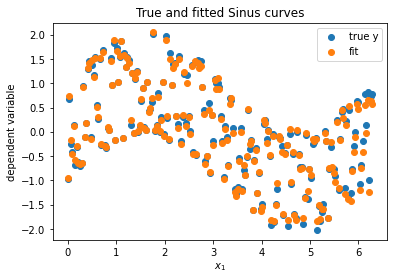

In [46]:
plt.figure(1)
plt.scatter(x1, dep, label="true y")
plt.scatter(x1, pred, label="fit")
plt.legend()

plt.title("True and fitted Sinus curves")
plt.xlabel("$x_1$")
plt.ylabel("dependent variable")


Text(0, 0.5, 'dependent variable')

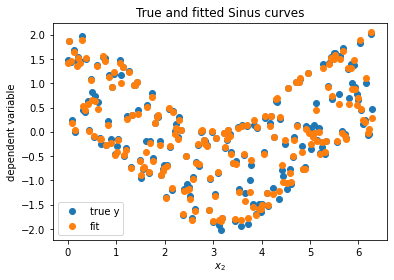

In [47]:
plt.figure(2)
plt.scatter(x2, dep, label="true y")
plt.scatter(x2, pred, label="fit")
plt.legend()

plt.title("True and fitted Sinus curves")
plt.xlabel("$x_2$")
plt.ylabel("dependent variable")

In [48]:
#shapley values for keras example
explainer = shap.KernelExplainer(model = model.predict, data = design.iloc[:,:], link = "identity")
shap_values = explainer.shap_values(design.iloc[:,:], nsamples=800)



Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 2400x2400 with 0 Axes>

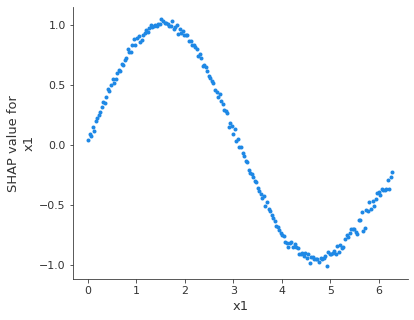

In [49]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("x1", shap_values[0], design, interaction_index=None) #works


<Figure size 2400x2400 with 0 Axes>

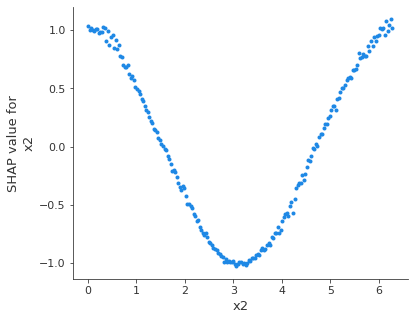

In [50]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("x2", shap_values[0], design, interaction_index=None) #works



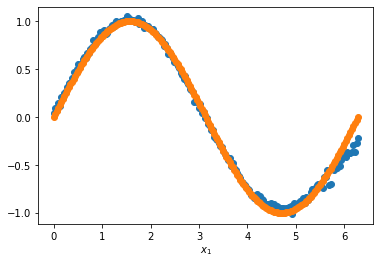

In [53]:
shaps = shap_values[0][:,0]                   #This plot
plt.scatter(x1, shaps, label="Shap")
plt.scatter(x1, y_sin, label="$f_1(x_1)$")
#plt.legend()
plt.xlabel("$x_1$")

plt.savefig('model1_x1.png', transparent=True)

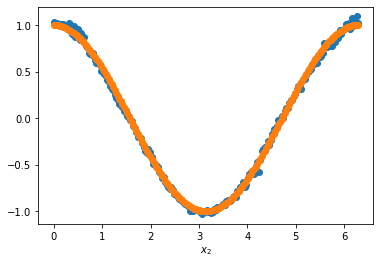

In [54]:
shaps = shap_values[0][:,1]                   #This plot
plt.scatter(x2, shaps, label="Shap")
plt.scatter(x2, y_cos, label="$f_2(x_2)$")
#plt.legend()
plt.xlabel("$x_2$")

plt.savefig('model1_x2.png', transparent=True)